<a href="https://colab.research.google.com/github/Nirzaree/MLWithPython/blob/master/ML_Learning_101_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concept

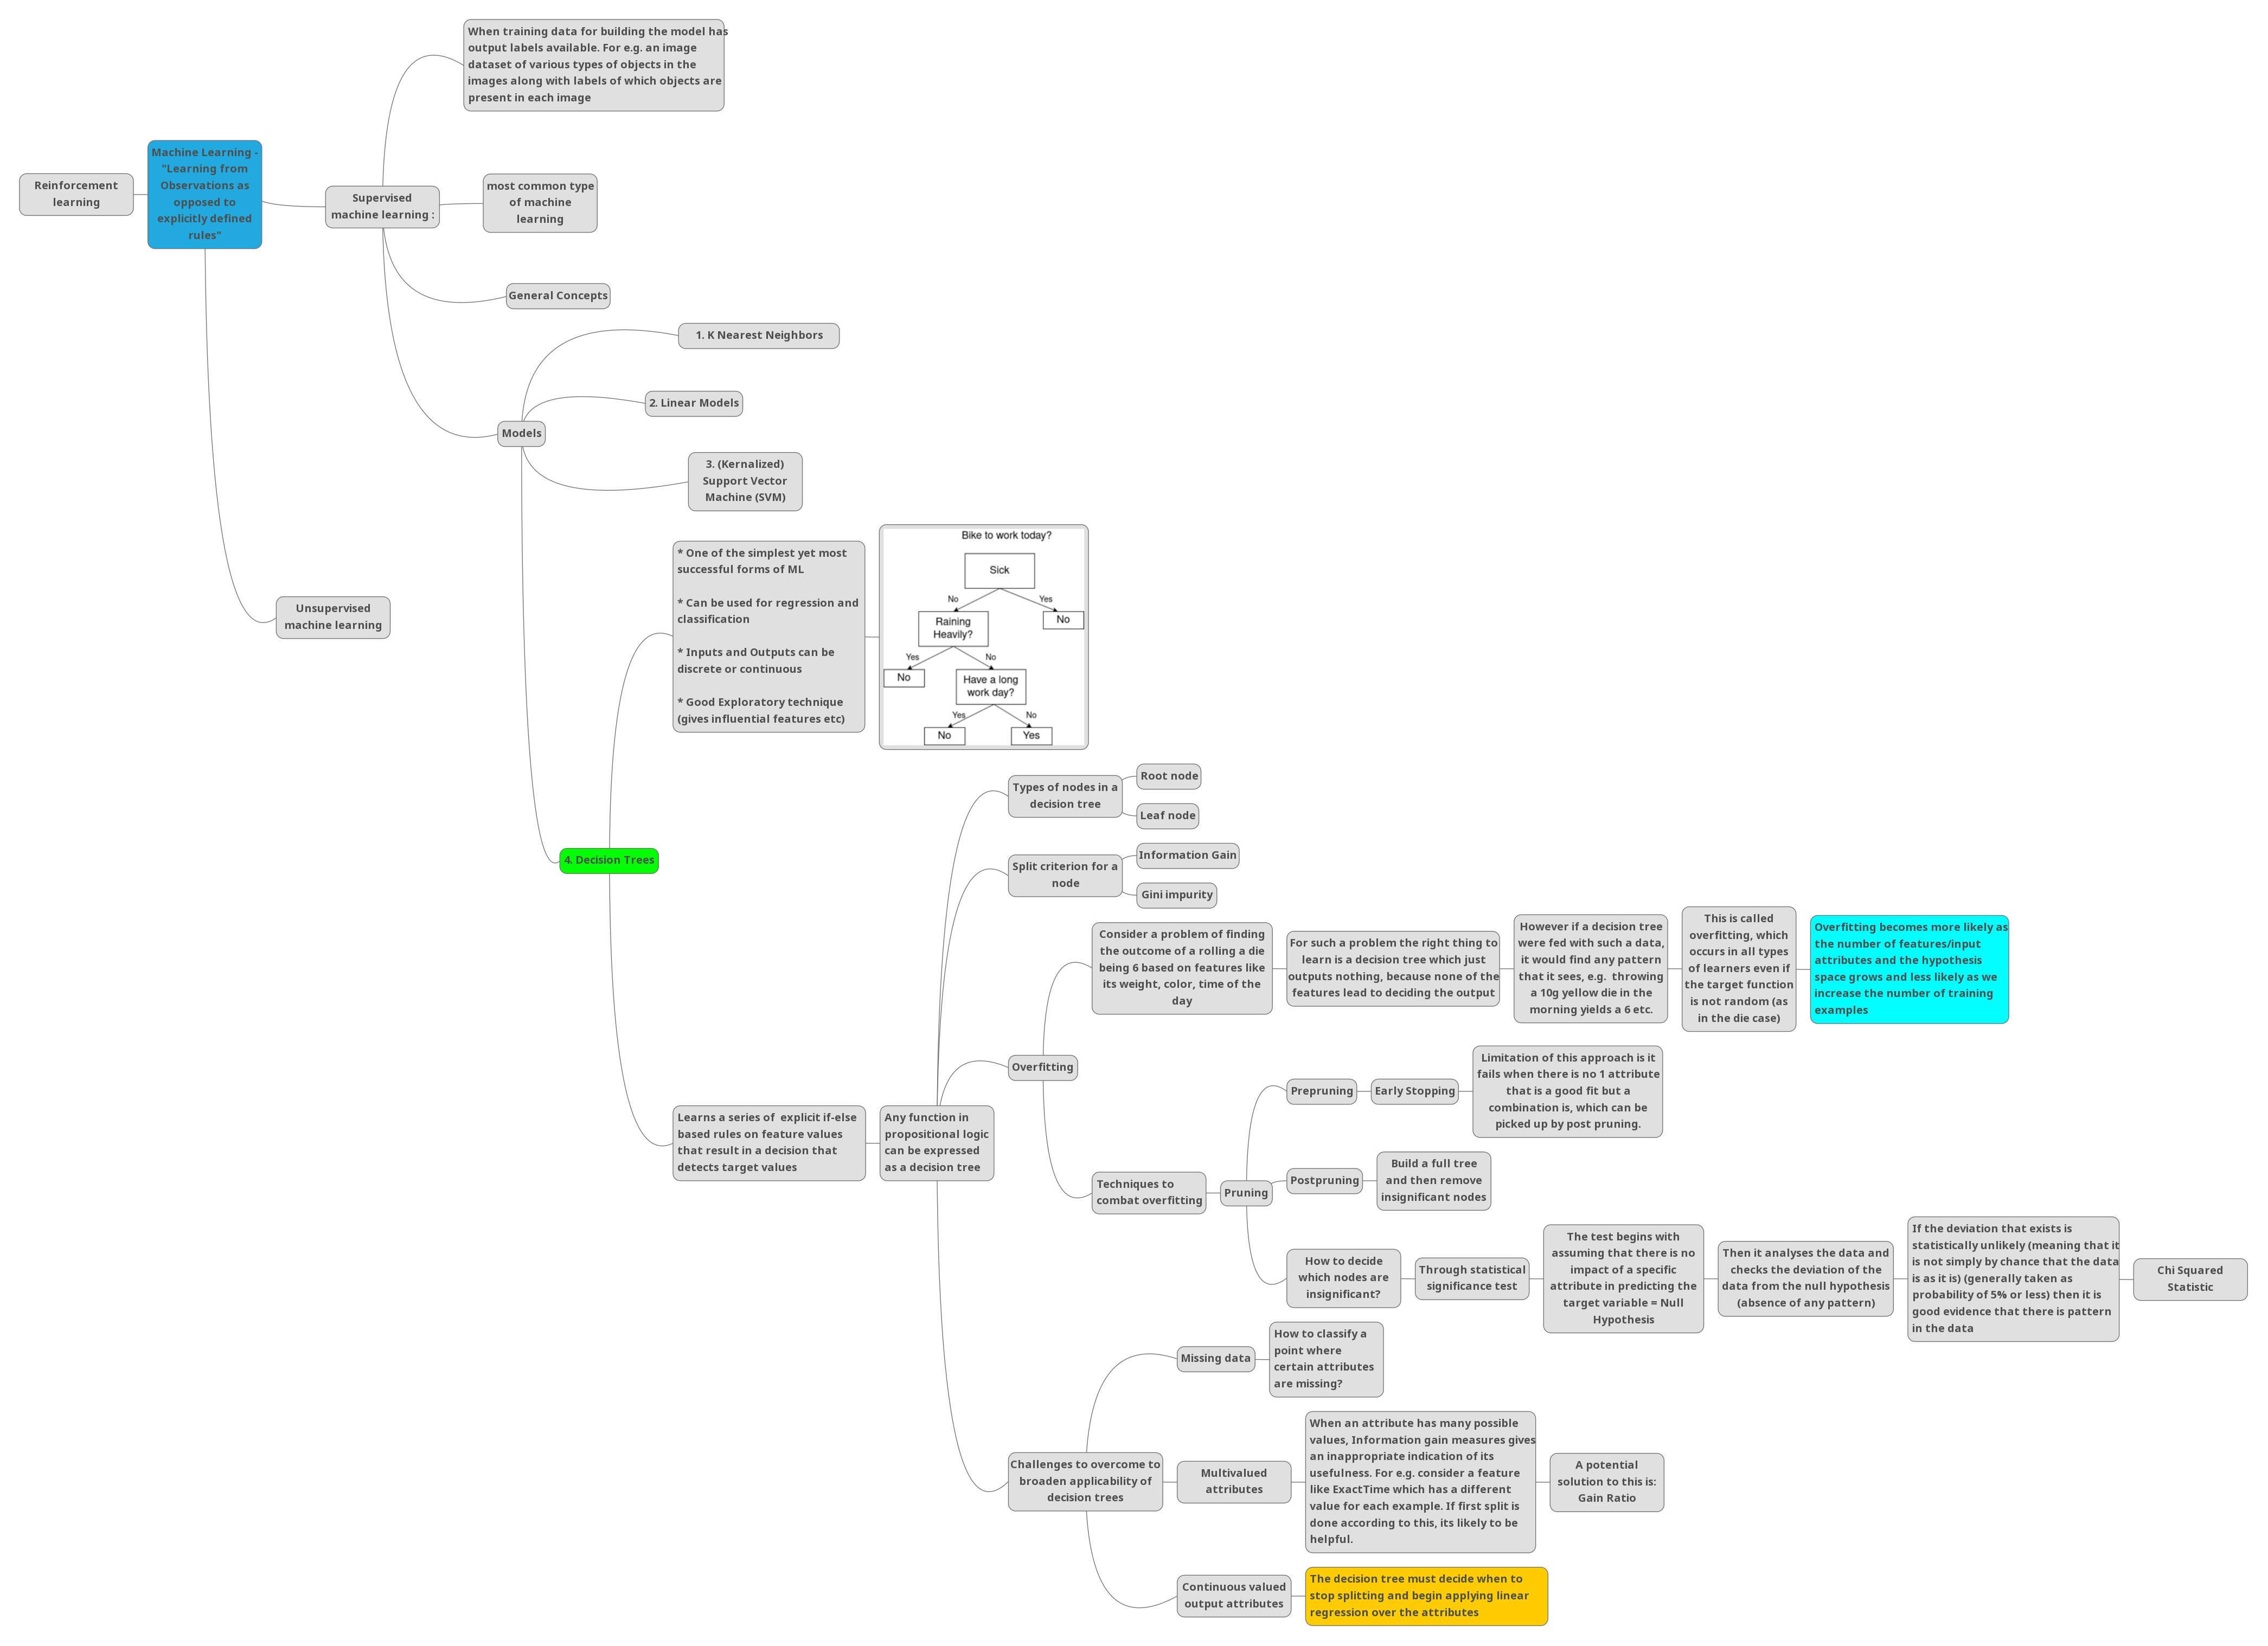

# Setup 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris,load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [2]:
np.set_printoptions(precision=2)

# Case Studies

## 1. Iris

In [3]:
Iris = load_iris()

In [4]:
print(Iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
X_Iris,y_Iris = pd.DataFrame(Iris.data,columns=Iris.feature_names),pd.Series(Iris.target,name = 'Species')

In [6]:
X_Iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
DTIris = DecisionTreeClassifier()

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_Iris,y_Iris,random_state = 0)

In [9]:
DTIris.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
print("Accuracy (Training Data) = {}".format(DTIris.score(X_train,y_train)))
print("Accuracy (Testing Data) = {:.2f}".format(DTIris.score(X_test,y_test)))

Accuracy (Training Data) = 1.0
Accuracy (Testing Data) = 0.97


### Plot Decision Tree

* sklearn.tree module's plot_tree function
  * specify feature_names, class_labels and filled argument (if True it paints the nodes to the color of the majority class)

In [11]:
from sklearn import tree

[Text(223.2, 391.392, 'petal length (cm) <= 2.35\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = virginica'),
 Text(167.39999999999998, 304.416, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(279.0, 304.416, 'petal length (cm) <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = virginica'),
 Text(111.6, 217.44, 'petal width (cm) <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = versicolor'),
 Text(55.8, 130.464, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(167.39999999999998, 130.464, 'sepal width (cm) <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(111.6, 43.488, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(223.2, 43.488, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(446.4, 217.44, 'petal length (cm) <= 5.05\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]\nclass = virginica'),
 Text(390.59999999999997, 130.

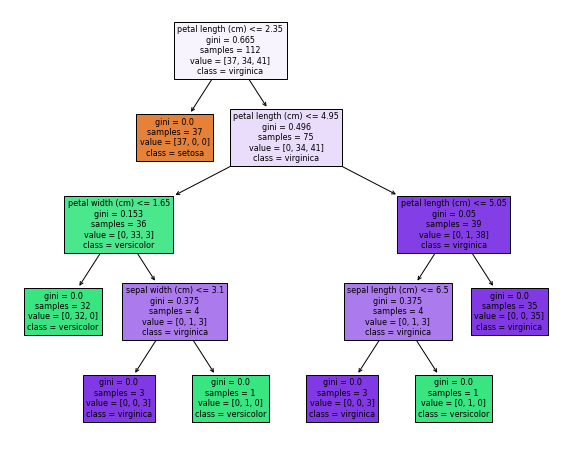

In [12]:
plt.figure(figsize = (10,8))
tree.plot_tree(DTIris,
               feature_names = Iris.feature_names,
               class_names = Iris.target_names,
               filled = True)

### Preprune tree

In [13]:
DTIris2 = DecisionTreeClassifier(max_depth=3)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X_Iris,y_Iris,random_state = 0)

In [15]:
DTIris2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
print("Accuracy (Training Data) = {:.2f}".format(DTIris2.score(X_train,y_train)))
print("Accuracy (Testing Data) = {:.2f}".format(DTIris2.score(X_test,y_test)))

Accuracy (Training Data) = 0.98
Accuracy (Testing Data) = 0.97


[Text(209.25, 380.52, 'petal length (cm) <= 2.35\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = virginica'),
 Text(139.5, 271.8, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(279.0, 271.8, 'petal length (cm) <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = virginica'),
 Text(139.5, 163.07999999999998, 'petal width (cm) <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = versicolor'),
 Text(69.75, 54.360000000000014, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(209.25, 54.360000000000014, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(418.5, 163.07999999999998, 'petal length (cm) <= 5.05\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]\nclass = virginica'),
 Text(348.75, 54.360000000000014, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(488.25, 54.360000000000014, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]\nclass = virginica')]

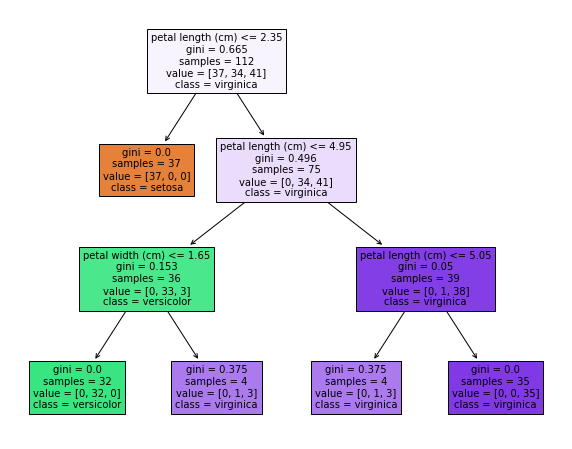

In [17]:
plt.figure(figsize = (10,8))
tree.plot_tree(DTIris2,
               feature_names = Iris.feature_names,
               class_names = Iris.target_names,
               filled = True)

### Feature Importance

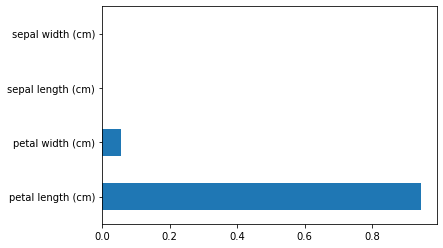

In [18]:
feat_imp = pd.Series(DTIris2.feature_importances_,index=X_train.columns)
feat_imp.nlargest(20).plot(kind = 'barh')

* New things to learn:
  * Horizontal bar plot function
      * [pandas.DataFrame.plot.barh](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html)

  * nlargest function:
    * [pandas.DataFrame.nlargest](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html)

### Visualize Decision Boundaries

## Breast Cancer Dataset 

In [19]:
BreastCancerData = load_breast_cancer()

In [20]:
print(BreastCancerData.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [21]:
X_BreastCancer,y_BreastCancer = pd.DataFrame(BreastCancerData.data,columns=BreastCancerData.feature_names),pd.Series(BreastCancerData.target,name = 'Diagnosis')

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X_BreastCancer,y_BreastCancer)

In [23]:
DTCancer = DecisionTreeClassifier()

In [24]:
DTCancer.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
print("DT F1 score (training data) = {}".format(f1_score(y_train,DTCancer.predict(X_train))))

DT F1 score (training data) = 1.0


In [26]:
print("DT F1 score (test data) = {}".format(f1_score(y_test,DTCancer.predict(X_test))))

DT F1 score (test data) = 0.9456521739130435


In [27]:
print(DTCancer.tree_.max_depth)

7


### Reduce overfitting

In [28]:
DTCancer2 = DecisionTreeClassifier(max_depth=3)

In [29]:
DTCancer2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

* What does random_state in the classifier do? 
  * The problem of building an optimal tree is considered NP complete under various (even simple) aspects. 
  * Hence,  practical decision tree algos based on various heuristic such as the greedy algorithm
  * https://stackoverflow.com/questions/39158003/confused-about-random-state-in-decision-tree-of-scikit-learn

In [30]:
print("DT F1 score (training data) = {}".format(f1_score(y_train,DTCancer2.predict(X_train))))

DT F1 score (training data) = 0.9833641404805915


In [31]:
print("DT F1 score (test data) = {}".format(f1_score(y_test,DTCancer2.predict(X_test))))

DT F1 score (test data) = 0.9565217391304348


References: 
1. Applied Machine Learning in Python - Coursera 